#### DATA CLEANING AND REPROCESSING

In [5]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold


In [3]:
#Load the dataset and display the first 5 rows
df=pd.read_csv('ai_assistant_usage_student_life.csv')
df.head()


,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [ ]:
#Check the dataset shape (rows, columns)

df.shape

(10000, 11)

In [ ]:
#Display column names and their data types.
df.dtypes

,0
SessionID,object
StudentLevel,object
Discipline,object
SessionDate,object
SessionLengthMin,float64
TotalPrompts,int64
TaskType,object
AI_AssistanceLevel,int64
FinalOutcome,object
UsedAgain,bool


In [ ]:
#Check for missing values in each column
missing_values_count = df.isnull().sum()
print(missing_values_count)

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64


In [ ]:
#Show summary statistics for SessionLengthMin and TotalPrompts.

print(df[['SessionLengthMin', 'TotalPrompts']].describe())


       SessionLengthMin  TotalPrompts
count      10000.000000  10000.000000
mean          19.846467      5.607500
std           13.897302      4.648764
min            0.030000      1.000000
25%            9.630000      2.000000
50%           16.650000      4.000000
75%           26.670000      8.000000
max          110.810000     39.000000


In [ ]:
#Find the number of unique values in StudentLevel, Discipline, and TaskType.
print(df[['StudentLevel', 'Discipline', 'TaskType']].nunique())


StudentLevel    3
Discipline      7
TaskType        6
dtype: int64


In [ ]:
#most common task

df['TaskType'].value_counts().idxmax()

'Writing'

In [ ]:
#Calculate the average SessionLengthMin for each StudentLevel.

df.groupby('StudentLevel')['SessionLengthMin'].mean()

,SessionLengthMin
StudentLevel,
Graduate,20.252236
High School,20.023740
Undergraduate,19.650943


#### VISUALIZATION

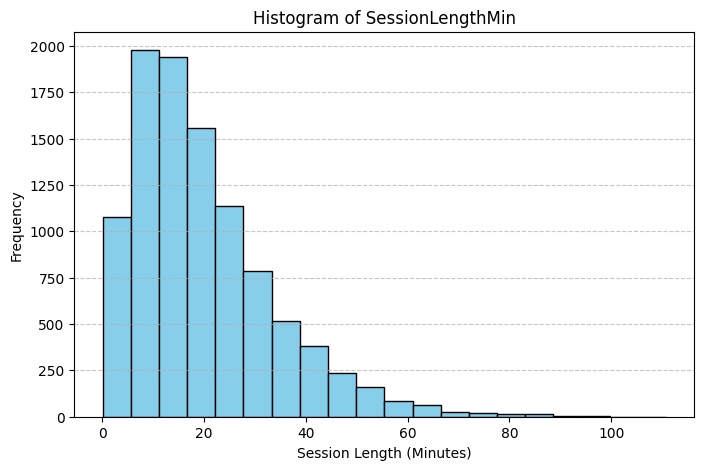

In [ ]:
#Plot a histogram of SessionLengthMin
plt.figure(figsize=(8,5))
plt.hist(df['SessionLengthMin'], bins=20,color ='skyblue', edgecolor='black')
plt.xlabel('Session Length (Minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of SessionLengthMin')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

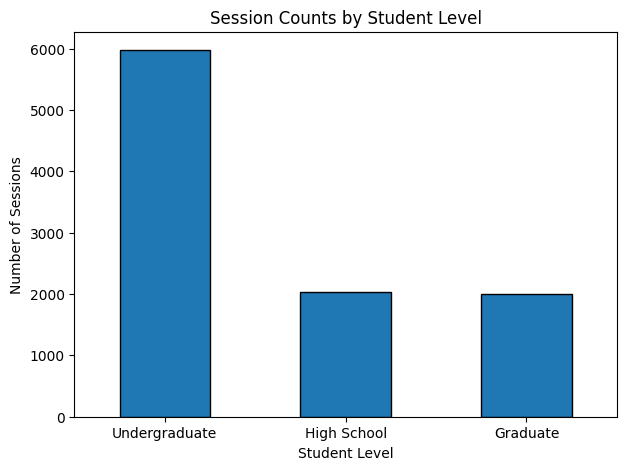

In [ ]:
#Create a bar chart of session counts by StudentLevel.

plt.figure(figsize=(7,5))
df['StudentLevel'].value_counts().plot(kind='bar', edgecolor='black')

plt.title("Session Counts by Student Level")
plt.xlabel("Student Level")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=0)
plt.show()


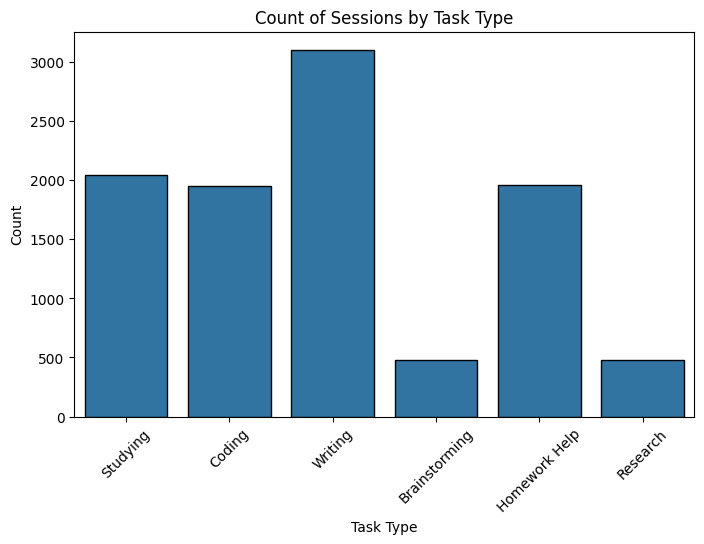

In [ ]:
#Make a countplot of TaskType using Seaborn
plt.figure(figsize=(8,5))
sns.countplot(x="TaskType", data=df, edgecolor="black")

plt.title("Count of Sessions by Task Type")
plt.xlabel("Task Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

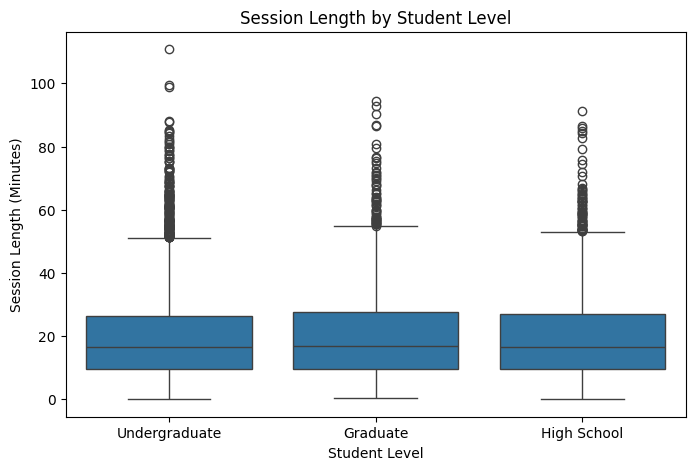

In [ ]:
#Plot a boxplot of SessionLengthMin grouped by StudentLevel.
plt.figure(figsize=(8,5))
sns.boxplot(x="StudentLevel", y="SessionLengthMin", data=df)

plt.title("Session Length by Student Level")
plt.xlabel("Student Level")
plt.ylabel("Session Length (Minutes)")
plt.show()

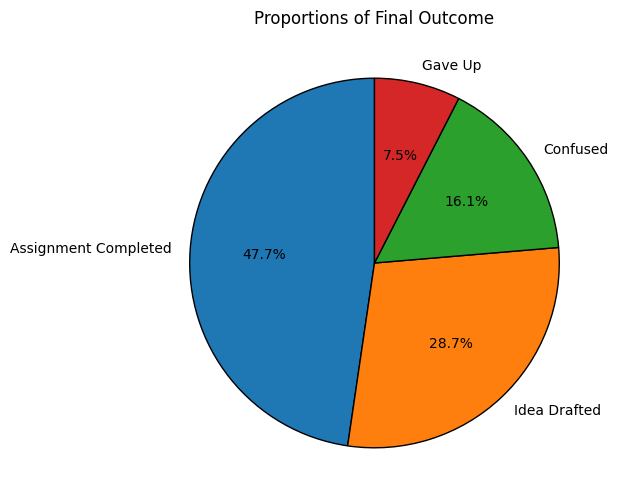

In [ ]:
# Pie chart of FinalOutcome proportions

plt.figure(figsize=(6,6))
df['FinalOutcome'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor':'black'}
)

plt.title("Proportions of Final Outcome")
plt.ylabel("")
plt.show()

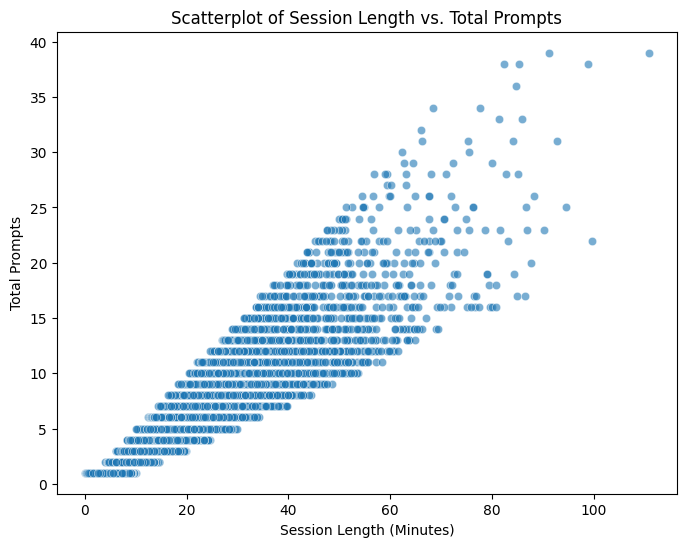

In [ ]:
#Draw a scatterplot of SessionLengthMin vs. TotalPrompts.

plt.figure(figsize=(8,6))
sns.scatterplot(x="SessionLengthMin", y="TotalPrompts", data=df, alpha=0.6)

plt.title("Scatterplot of Session Length vs. Total Prompts")
plt.xlabel("Session Length (Minutes)")
plt.ylabel("Total Prompts")
plt.show()

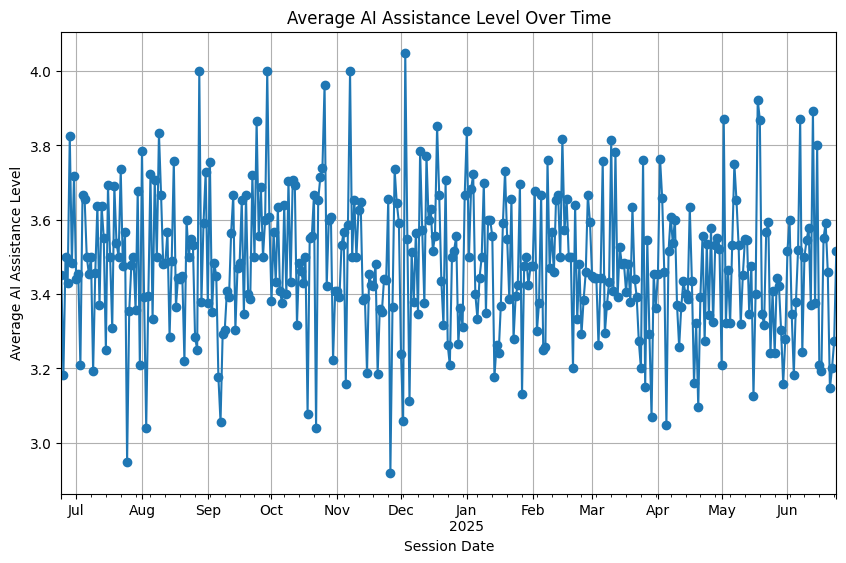

In [ ]:
#Plot a line chart of average AI_AssistanceLevel over time (SessionDate).
df['SessionDate'] = pd.to_datetime(df['SessionDate'])
avg_assist = df.groupby('SessionDate')['AI_AssistanceLevel'].mean()
plt.figure(figsize=(10,6))
avg_assist.plot(kind='line', marker='o')

plt.title("Average AI Assistance Level Over Time")
plt.xlabel("Session Date")
plt.ylabel("Average AI Assistance Level")
plt.grid(True)
plt.show()

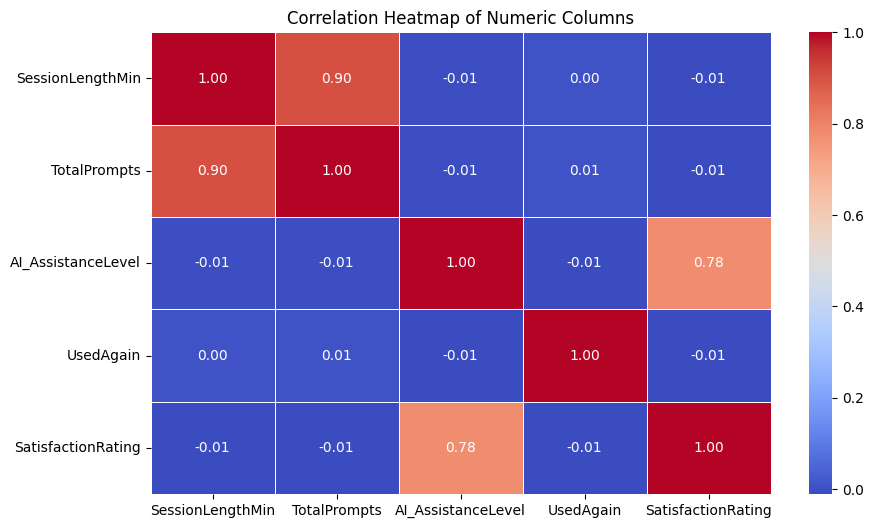

In [ ]:
#Create a heatmap of correlations among numeric features.

corr_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Numeric Columns')
plt.show()



####GROUPBY AND AGGREGATIONS

In [ ]:
#Find the average SessionLengthMin for each TaskType.
avg_session_length= df.groupby('TaskType')['SessionLengthMin'].mean()
avg_session_length

,SessionLengthMin
TaskType,
Brainstorming,21.964223
Coding,19.467659
Homework Help,19.940536
Research,20.410000
Studying,19.705917
Writing,19.705888


In [ ]:
#Which Discipline had the most sessions
most_sess_discpline= df['Discipline'].value_counts().idxmax()
most_sess_discpline

'Biology'

In [ ]:
#Compare average AI_AssistanceLevel across StudentLevel.
average_AI_AssistanceLevel = df.groupby('StudentLevel')['AI_AssistanceLevel'].mean()
average_AI_AssistanceLevel

,AI_AssistanceLevel
StudentLevel,
Graduate,3.469674
High School,3.477060
Undergraduate,3.483607


In [ ]:
#Find the most common FinalOutcome for Graduate students.
most_common_FinalOutcome =df['FinalOutcome'].value_counts().idxmax()
most_common_FinalOutcome

'Assignment Completed'

In [ ]:
#Calculate the median SessionLengthMin for each FinalOutcome
median_session_length = df.groupby('FinalOutcome')['SessionLengthMin'].median()
median_session_length

,SessionLengthMin
FinalOutcome,
Assignment Completed,16.570
Confused,16.040
Gave Up,17.290
Idea Drafted,17.085


#### FEATURE ENGINEERING AND ENCODING

In [ ]:
#Convert SessionDate into Year, Month, and Day columns.

df['Year'] = df['SessionDate'].dt.year
df['Month'] = df['SessionDate'].dt.month
df['Day'] = df['SessionDate'].dt.day
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11,3
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8,25
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1,12
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5,6
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3,18


In [ ]:
#Encode StudentLevel using Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['StudentLevel_encoded'] = le.fit_transform(df['StudentLevel'])


In [ ]:
#Apply One-Hot Encoding to TaskType

df_encoded = pd.get_dummies(df, columns=['TaskType'])
df_encoded

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,StudentLevel_encoded,TaskType_Brainstorming,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,2,Assignment Completed,True,1.0,2024,11,3,2,False,False,False,False,True,False
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,3,Assignment Completed,True,2.0,2024,8,25,2,False,False,False,False,True,False
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,3,Assignment Completed,True,3.3,2025,1,12,2,False,True,False,False,False,False
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,3,Assignment Completed,True,3.5,2025,5,6,2,False,True,False,False,False,False
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,3,Assignment Completed,True,2.9,2025,3,18,2,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,SESSION09996,Undergraduate,Psychology,2024-07-20,28.41,5,3,Assignment Completed,True,4.2,2024,7,20,2,False,False,False,False,True,False
9996,SESSION09997,High School,Business,2024-11-11,13.98,6,5,Assignment Completed,True,5.0,2024,11,11,1,False,False,False,False,False,True
9997,SESSION09998,Undergraduate,Biology,2024-09-11,10.78,2,3,Idea Drafted,True,3.5,2024,9,11,2,False,False,False,False,True,False
9998,SESSION09999,Undergraduate,Business,2024-10-27,30.88,7,3,Assignment Completed,False,4.3,2024,10,27,2,False,False,False,False,False,True


In [ ]:
#Create a new feature: PromptsPerMinute = TotalPrompts / SessionLengthMin.

df['PromptsPerMinute'] = df['TotalPrompts'] / df['SessionLengthMin']
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,StudentLevel_encoded,PromptsPerMinute
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11,3,2,0.352564
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8,25,2,0.458365
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1,12,2,0.260146
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5,6,2,0.270270
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3,18,2,0.320057


In [ ]:
#Bin SessionLengthMin into categories: Short, Medium, Long.

bins = [0, 30, 60, float('inf')]
labels = ['Short', 'Medium', 'Long']

df['SessionLengthCategory'] = pd.cut(df['SessionLengthMin'], bins=bins, labels=labels, right=False)
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,StudentLevel_encoded,PromptsPerMinute,SessionLengthCategory
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11,3,2,0.352564,Medium
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8,25,2,0.458365,Short
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1,12,2,0.260146,Short
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5,6,2,0.270270,Short
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3,18,2,0.320057,Short


MACHINE LEARNING (CLASSIFICATION MODELS)

In [ ]:
#Predict FinalOutcome using a Decision Tree Classifier

X = df.drop(columns=['FinalOutcome','SessionDate'])
y = df['FinalOutcome']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.497

Classification Report:
                       precision    recall  f1-score   support

Assignment Completed       0.55      0.81      0.65       953
            Confused       0.36      0.36      0.36       323
             Gave Up       0.30      0.06      0.10       151
        Idea Drafted       0.42      0.17      0.24       573

            accuracy                           0.50      2000
           macro avg       0.41      0.35      0.34      2000
        weighted avg       0.46      0.50      0.45      2000


Confusion Matrix:
 [[770  96   6  81]
 [155 117  12  39]
 [ 68  56   9  18]
 [416  56   3  98]]


In [ ]:
#Predict UsedAgain using Logistic Regression.

y = df['UsedAgain']
X = df.drop(columns=['UsedAgain', 'SessionDate'])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7425

Confusion Matrix:
 [[ 274  313]
 [ 202 1211]]

Classification Report:
               precision    recall  f1-score   support

       False       0.58      0.47      0.52       587
        True       0.79      0.86      0.82      1413

    accuracy                           0.74      2000
   macro avg       0.69      0.66      0.67      2000
weighted avg       0.73      0.74      0.73      2000



In [ ]:
#Train a Random Forest Classifier to predict FinalOutcome.

y = df['FinalOutcome']
X = df.drop(columns=['FinalOutcome', 'SessionDate'])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(n_estimators=100,max_depth=None,random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4795

Confusion Matrix:
 [[830  28   1  94]
 [235  51   1  36]
 [109  24   0  18]
 [477  18   0  78]]

Classification Report:
                       precision    recall  f1-score   support

Assignment Completed       0.50      0.87      0.64       953
            Confused       0.42      0.16      0.23       323
             Gave Up       0.00      0.00      0.00       151
        Idea Drafted       0.35      0.14      0.20       573

            accuracy                           0.48      2000
           macro avg       0.32      0.29      0.27      2000
        weighted avg       0.41      0.48      0.40      2000



In [ ]:
#Use KNN (K-Nearest Neighbors) to classify UsedAgain.

y = df['UsedAgain']
X = df.drop(columns=['UsedAgain', 'SessionDate'])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.7155

Confusion Matrix:
 [[ 127  460]
 [ 109 1304]]

Classification Report:
               precision    recall  f1-score   support

       False       0.54      0.22      0.31       587
        True       0.74      0.92      0.82      1413

    accuracy                           0.72      2000
   macro avg       0.64      0.57      0.56      2000
weighted avg       0.68      0.72      0.67      2000



In [ ]:
#Build a Gradient Boosting Classifier for UsedAgain

y = df['UsedAgain']
X = df.drop(columns=['UsedAgain', 'SessionDate'])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

gb = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.743

Confusion Matrix:
 [[ 268  319]
 [ 195 1218]]


In [ ]:
#Apply an XGBoost Classifier to predict FinalOutcome

le = LabelEncoder()
y = le.fit_transform(df['FinalOutcome'])

X = df.drop(columns=['FinalOutcome', 'SessionDate'])
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

xgb = XGBClassifier(n_estimators=200,learning_rate=0.1,max_depth=5,random_state=42,use_label_encoder=False,eval_metric='mlogloss')

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:43:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.4795

Confusion Matrix:
 [[728  71   4 150]
 [171  88   8  56]
 [ 71  48   4  28]
 [400  32   2 139]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.76      0.63       953
           1       0.37      0.27      0.31       323
           2       0.22      0.03      0.05       151
           3       0.37      0.24      0.29       573

    accuracy                           0.48      2000
   macro avg       0.37      0.33      0.32      2000
weighted avg       0.44      0.48      0.44      2000



MODEL EVALUATION & HYPERPARAMETER TUNING

In [42]:
import pandas as pd
from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv("ai_assistant_usage_student_life.csv")

# Target and features
y = df['FinalOutcome']
X = df.drop(columns=['FinalOutcome', 'SessionDate', 'SessionID'])

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Build pipeline (scaling + logistic regression)
pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # with_mean=False works with sparse data
    ('log_reg', LogisticRegression(max_iter=1000, solver='saga', random_state=42))
])

# Cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Multiple metrics to evaluate
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

# Print results
print("Accuracy:", results['test_accuracy'].mean())
print("Precision:", results['test_precision_macro'].mean())
print("Recall:", results['test_recall_macro'].mean())
print("F1 Score:", results['test_f1_macro'].mean())


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5013
Precision: 0.3433046026484578
Recall: 0.3298753202058094
F1 Score: 0.2992309423209874


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
#Use GridSearchCV to tune hyperparameters of a Decision Tree.

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Target and features
y = df['FinalOutcome']
X = df.drop(columns=['FinalOutcome', 'SessionDate', 'SessionID'])

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Smaller hyperparameter grid for efficiency
param_grid_small = {
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

# GridSearch with 5-fold CV
grid_search_small = GridSearchCV(estimator=dt,
                                 param_grid=param_grid_small,
                                 cv=5,
                                 scoring='accuracy',
                                 n_jobs=-1)

# Fit model
grid_search_small.fit(X_train, y_train)

# Results
best_params_small = grid_search_small.best_params_
best_cv_score_small = grid_search_small.best_score_
test_accuracy_small = grid_search_small.best_estimator_.score(X_test, y_test)

print("Best Parameters:", best_params_small)
print("Best Cross-Validation Accuracy:", best_cv_score_small)
print("Test Accuracy:", test_accuracy_small)


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.49700000000000005
Test Accuracy: 0.503


In [8]:
#Tune a Random Forest Classifier (n_estimators, max_depth)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],   # number of trees
    'max_depth': [5, 10, None]        # tree depth
}

# GridSearch with 5-fold CV
grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-1)

# Fit model
grid_search_rf.fit(X_train, y_train)

# Results
best_params_rf = grid_search_rf.best_params_
best_cv_score_rf = grid_search_rf.best_score_
test_accuracy_rf = grid_search_rf.best_estimator_.score(X_test, y_test)

print("Best Parameters:", best_params_rf)
print("Best Cross-Validation Accuracy:", best_cv_score_rf)
print("Test Accuracy:", test_accuracy_rf)


Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.491875
Test Accuracy: 0.486


In [6]:
# Target and features
y = df['UsedAgain']
X = df.drop(columns=['UsedAgain', 'SessionDate', 'SessionID'], errors='ignore')

# One-hot encode
X = pd.get_dummies(X, drop_first=True)

# Scale features for models sensitive to feature magnitude (LogReg, KNN, NB)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False,
                                 eval_metric='logloss',
                                 random_state=42,
                                 n_jobs=-1)
}

# Compare models with cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = (scores.mean(), scores.std())

# Print results
for model_name, (mean_acc, std_acc) in results.items():
    print(f"{model_name}: Mean CV Accuracy = {mean_acc:.3f}, Std = {std_acc:.3f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:36:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:36:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:36:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:36:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Logistic Regression: Mean CV Accuracy = 0.755, Std = 0.007
Decision Tree: Mean CV Accuracy = 0.630, Std = 0.008
Random Forest: Mean CV Accuracy = 0.727, Std = 0.004
Naive Bayes: Mean CV Accuracy = 0.744, Std = 0.007
KNN: Mean CV Accuracy = 0.712, Std = 0.003
Gradient Boosting: Mean CV Accuracy = 0.749, Std = 0.005
XGBoost: Mean CV Accuracy = 0.719, Std = 0.005


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:36:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
